# Load the dataframe

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [7]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple statistic and filtering

In [11]:
df.loc[df['   TG'] != -9999]['   TG'].mean()

np.float64(63.607875261284676)

In [15]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

np.float64(26.2)

In [14]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

np.float64(-28.8)

<Axes: >

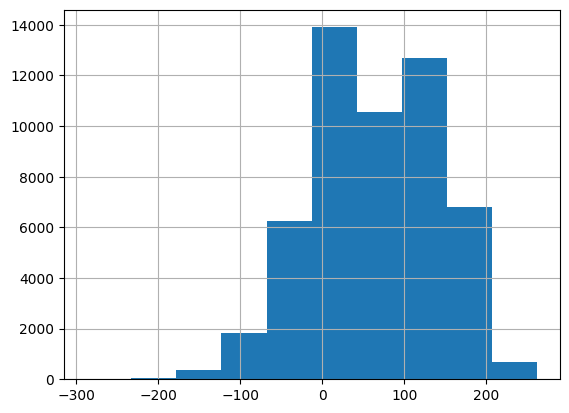

In [18]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [20]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [22]:
df.loc[df['    DATE']=="1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,0


In [25]:
df.loc[df['    DATE']=="1860-01-05"]['   TG'].squeeze() / 10

np.float64(3.1)

In [32]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [33]:
df.loc[3, '   TG']

np.int64(37)

## Calculate a new column out of exising column

In [42]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,33.8,33.8,21.0
1,1,35381,1860-01-02,46,0,33.8,33.8,46.0
2,1,35381,1860-01-03,31,0,33.8,33.8,31.0
3,1,35381,1860-01-04,37,0,33.8,33.8,37.0
4,1,35381,1860-01-05,31,0,33.8,33.8,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,33.8,33.8,NaN
59317,1,35381,2022-05-28,-9999,9,33.8,33.8,NaN
59318,1,35381,2022-05-29,-9999,9,33.8,33.8,NaN
59319,1,35381,2022-05-30,-9999,9,33.8,33.8,NaN


In [43]:
df["TG"] = df['TG0'] / 10

In [44]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,33.8,21.0
1,1,35381,1860-01-02,46,0,4.6,33.8,46.0
2,1,35381,1860-01-03,31,0,3.1,33.8,31.0
3,1,35381,1860-01-04,37,0,3.7,33.8,37.0
4,1,35381,1860-01-05,31,0,3.1,33.8,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,33.8,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,33.8,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,33.8,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,33.8,NaN


# Fahrenheit example

In [45]:
df["Fahrenheit"] = df["TG"] = (9/5) + 32

In [46]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,33.8,33.8,21.0
1,1,35381,1860-01-02,46,0,33.8,33.8,46.0
2,1,35381,1860-01-03,31,0,33.8,33.8,31.0
3,1,35381,1860-01-04,37,0,33.8,33.8,37.0
4,1,35381,1860-01-05,31,0,33.8,33.8,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,33.8,33.8,NaN
59317,1,35381,2022-05-28,-9999,9,33.8,33.8,NaN
59318,1,35381,2022-05-29,-9999,9,33.8,33.8,NaN
59319,1,35381,2022-05-30,-9999,9,33.8,33.8,NaN


# Plotting

<Axes: >

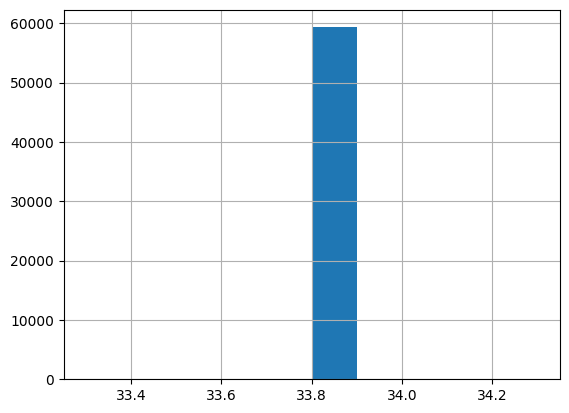

In [50]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

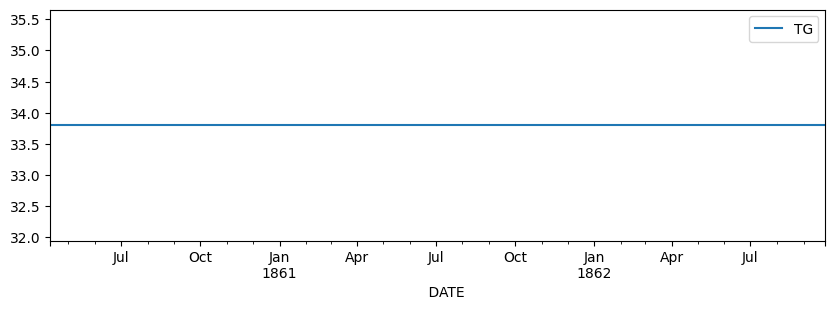

In [59]:
df[100:1000].plot(x='    DATE', y="TG", figsize=(10, 3))